## Image Mapping

In [2]:
import numpy as np
from numpy import linalg

In [3]:
def H_from_points(fp, tp):
    """
    Return the linear transformation from `origin_p` to `target_p`.
    Detail of this algorithm: See the note in the book.
    """
    if fp.shape != tp.shape:
        raise RuntimeError("Shapes do not match.")
    
    m = mean(fp[:2], axis = 1)
    maxstd = max(np.std(fp[:2], axis = 1)) + 1e-9
    C1 = diag([1/maxstd, 1/maxstd, 1])
    C1[0][2] = -m[0]/maxstd
    C1[1][2] = -m[1]/maxstd
    fp = dot(C1, fp)
    
    m = mean(tp[:2], axis = 1)
    maxstd = max(np.std(tp[:2], axis = 1)) + 1e-9
    C2 = diag([1/maxstd, 1/maxstd, 1])
    C2[0][2] = -m[0]/maxstd
    C2[1][2] = -m[1]/maxstd
    tp = dot(C2, tp)
    
    nbr_correspondences = fp.shape[1]
    A = np.zeros((2*nbr_correspondences, 9))
    for i in range(nbr_correspondences):
        A[2*i] = [-fp[0][i], -fp[1][i], -1, 0, 0, 0, fp[0][i]*tp[0][i], fp[1][i]*tp[0][i], tp[0][i]]
        A[2*i + 1] = [0, 0, 0, -fp[0][i], -fp[1][i], -1, fp[0][i]*tp[1][i], fp[1][i]*tp[1][i], tp[1][i]]
    
    U, S, V = linalg.svd(A)
    H = V[8].reshape((3, 3))
    
    H = np.dot(linalg.inv(C2), np.dot(H, C1))
    
    return H/H[2, 2]

In [4]:
from PIL import Image

In [6]:
from scipy import ndimage

In [5]:
img1 = Image.open("../data/empire.jpg")

In [ ]:
fp＝

In [2]:
import numpy as np

In [5]:
a1 = np.array([[1, 2, 3], [3, 4, 5]])

In [6]:
a1[:2]

array([[1, 2, 3],
       [3, 4, 5]])

In [7]:
print np.mean.__doc__


    Compute the arithmetic mean along the specified axis.

    Returns the average of the array elements.  The average is taken over
    the flattened array by default, otherwise over the specified axis.
    `float64` intermediate and return values are used for integer inputs.

    Parameters
    ----------
    a : array_like
        Array containing numbers whose mean is desired. If `a` is not an
        array, a conversion is attempted.
    axis : int, optional
        Axis along which the means are computed. The default is to compute
        the mean of the flattened array.
    dtype : data-type, optional
        Type to use in computing the mean.  For integer inputs, the default
        is `float64`; for floating point inputs, it is the same as the
        input dtype.
    out : ndarray, optional
        Alternate output array in which to place the result.  The default
        is ``None``; if provided, it must have the same shape as the
        expected output, but the type will b

In [1]:
import numpy as np
import matplotlib.delaunay as md

/Users/DboyLiao/.pyenv/versions/cv279/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The matplotlib.delaunay module was deprecated in version 1.4. Use matplotlib.tri.Triangulation instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
import random

In [3]:
x, y = np.array(np.random.standard_normal((2, 100)))

In [4]:
np.random.standard_normal((2, 100))

array([[ 0.08564316,  0.5950931 , -0.68650929, -1.37114162,  1.67742048,
         0.1742559 , -1.00045983, -0.77997746,  1.0063596 , -1.69288765,
        -0.62509403,  2.08493267,  1.1341312 ,  1.11152603, -0.13367701,
         0.96148183,  0.32922212, -0.02610161, -0.28487007,  0.29620396,
         0.07370393, -1.9522791 , -0.75723521,  0.03426588,  0.12472895,
         0.62935098, -0.62373844, -0.36688764, -0.1534688 ,  0.30820247,
         0.0642229 ,  0.1620582 ,  0.37135524,  1.26661774, -0.35905677,
        -1.93166334, -1.11785139, -1.5955758 , -0.79744361, -0.53402735,
         1.37740969,  0.91863006,  0.23024918, -0.2325346 , -0.2469671 ,
         1.46780684, -1.55749078, -0.8059787 , -0.60106059, -0.3972173 ,
        -0.30609346,  0.17633381, -0.71038713, -1.18470404, -0.7550185 ,
         2.59530234, -0.72793698, -0.3016028 , -1.16512675,  0.03155226,
        -0.63521568,  0.29594556,  0.96141797, -1.48071635, -0.26960231,
        -1.16580516,  0.57326211,  0.57896394, -0.3

In [6]:
centers, edges, tri, neighbors = md.delaunay(x, y)

In [7]:
centers

array([[  9.37435930e-01,  -3.00782621e+00],
       [ -5.69299123e-01,  -2.20482327e+00],
       [ -6.05911102e-01,  -2.12690899e+00],
       [ -2.10136050e+00,  -2.43030072e+00],
       [  5.57308457e-01,  -1.98752957e+00],
       [ -1.61229309e-01,  -1.74137299e+00],
       [ -2.18908501e-01,  -1.59458014e+00],
       [ -7.13467445e-01,  -2.04781226e+00],
       [ -7.04611437e-01,  -2.04881549e+00],
       [ -7.01698500e-01,  -1.95457095e+00],
       [  9.24885041e-03,  -1.67670183e+00],
       [  3.61227347e-01,  -1.73313914e+00],
       [ -7.10509099e-02,  -1.41699755e+00],
       [  3.37092987e-01,  -1.71205199e+00],
       [  2.71036806e-01,  -1.67686998e+00],
       [ -1.91538501e-01,  -1.37591479e+00],
       [ -8.56079542e-01,  -1.44957905e+00],
       [  2.49009470e+00,  -4.77577146e+00],
       [  4.73336097e-01,  -1.29935933e+00],
       [  8.88143710e-01,  -1.40000598e+00],
       [  1.93271272e-01,  -1.31988984e+00],
       [  7.01092677e-01,  -1.30037366e+00],
       [ -

In [8]:
edges

array([[92, 19],
       [19, 28],
       [28, 18],
       [39, 18],
       [37, 39],
       [92, 37],
       [ 7, 28],
       [ 7, 18],
       [19, 44],
       [44, 28],
       [86,  7],
       [86, 18],
       [82, 86],
       [82, 18],
       [ 3, 18],
       [39,  3],
       [38,  3],
       [39, 38],
       [87,  7],
       [87, 86],
       [81, 82],
       [81, 18],
       [97, 28],
       [97,  7],
       [48, 86],
       [48, 82],
       [68, 28],
       [68, 97],
       [ 3, 81],
       [25,  7],
       [25, 87],
       [44, 26],
       [26, 28],
       [ 8, 86],
       [48,  8],
       [97, 25],
       [26, 68],
       [ 8, 87],
       [14, 97],
       [14, 25],
       [ 8, 25],
       [72, 25],
       [72,  8],
       [81, 48],
       [20, 68],
       [20, 97],
       [72, 14],
       [64, 48],
       [64, 81],
       [73, 68],
       [73, 20],
       [20, 14],
       [83,  8],
       [83, 48],
       [20, 41],
       [41, 14],
       [59, 14],
       [59, 72],
       [72, 35

In [9]:
tri

array([[92, 98,  2],
       [92,  2, 37],
       [37,  2,  1],
       [37, 23, 39],
       [98, 43,  2],
       [ 2, 42,  1],
       [ 1, 42, 21],
       [23, 37, 67],
       [ 1, 67, 37],
       [ 1,  4, 67],
       [ 2, 63, 42],
       [43, 66,  2],
       [63, 75, 42],
       [66, 29,  2],
       [63,  2, 29],
       [21, 42, 75],
       [ 4, 22, 67],
       [92, 19, 98],
       [29, 66, 62],
       [98, 52, 43],
       [29, 54, 63],
       [66, 43, 52],
       [75, 63, 54],
       [70, 52, 98],
       [22, 46, 67],
       [62, 66, 52],
       [52, 11, 62],
       [19, 70, 98],
       [39, 23, 95],
       [67, 95, 23],
       [46, 95, 67],
       [21,  4,  1],
       [21, 58,  4],
       [22,  4, 58],
       [75, 54, 27],
       [62, 54, 29],
       [46, 22, 58],
       [70, 57, 52],
       [75, 58, 21],
       [46, 58, 90],
       [39, 95, 38],
       [90, 58, 49],
       [62, 27, 54],
       [27, 62, 77],
       [11, 77, 62],
       [50, 84, 27],
       [11, 52, 57],
       [77, 5

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import matplotlib.pyplot as plt

In [17]:
img = plt.imread("../data/empire.jpg")

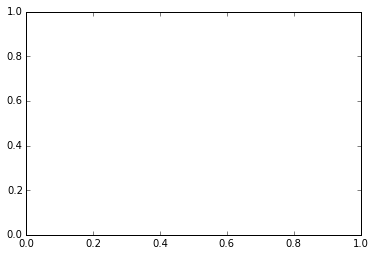

In [47]:
fig, axes = plt.subplots()

In [48]:
axe.imshow(img)

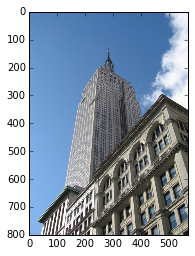

In [24]:
fig

In [12]:
from matplotlib.pylab import ginput

In [16]:
fig.ginput(n = 3)

[]

In [49]:
%%file try_ginput.py
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread("/Users/DboyLiao/Works/data/faces/15.jpg")
fig, ax = plt.subplots()
ax.imshow(img)

coords = fig.ginput(n = 3, timeout = 0)
print np.floor(coords)

Overwriting try_ginput.py


In [50]:
!python try_ginput.py

[[ 439.  237.]
 [ 853.  496.]
 [ 493.  507.]]


In [30]:
print fig.ginput.__doc__


        Call signature::

          ginput(self, n=1, timeout=30, show_clicks=True,
                 mouse_add=1, mouse_pop=3, mouse_stop=2)

        Blocking call to interact with the figure.

        This will wait for *n* clicks from the user and return a list of the
        coordinates of each click.

        If *timeout* is zero or negative, does not timeout.

        If *n* is zero or negative, accumulate clicks until a middle click
        (or potentially both mouse buttons at once) terminates the input.

        Right clicking cancels last input.

        The buttons used for the various actions (adding points, removing
        points, terminating the inputs) can be overriden via the
        arguments *mouse_add*, *mouse_pop* and *mouse_stop*, that give
        the associated mouse button: 1 for left, 2 for middle, 3 for
        right.

        The keyboard can also be used to select points in case your mouse
        does not have one or more of the buttons.  The delete and ba

In [51]:
a = np.array([1, 2, 3])

In [52]:
a.astype(str)

array(['1', '2', '3'], 
      dtype='|S21')